In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import torch
import warnings
from sklearn.model_selection import cross_val_score, StratifiedKFold

warnings.filterwarnings("ignore")

In [2]:
def preprocess_text(text, language):
    text = text.strip()
    # text = f"Review: {text} Language: {language}"
    return text

def XG(df):
    # Data Preprocessing
    # Separate features and labels
    X = df.drop('LABEL', axis=1)
    y = df['LABEL']

    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Model Training
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    model.fit(X_train, y_train)

    # Model Evaluation
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    
    print(f'Accuracy: {accuracy}')
    print('Classification Report:')
    print(pd.DataFrame(report).transpose().round(2).to_string())

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {df["LABEL"].iloc[0]}')
    plt.show()

def cross_validate_model(df, n_splits=5):
    # Data Preprocessing
    X = df.drop('LABEL', axis=1)
    y = df['LABEL']

    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Model
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

    # K-Fold Cross Validation
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

    print(f'Cross-Validation Accuracy Scores: {scores}')
    print(f'Mean Accuracy: {scores.mean()}')
    print(f'Standard Deviation: {scores.std()}')

## Sentence Transformers

In [3]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.4 MB/s eta 0:00:00


In [4]:
# Create 'sentence' directory if it doesn't exist
os.makedirs('sentence', exist_ok=True)

model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      808 non-null    object
 1   DATA    808 non-null    object
 2   LABEL   808 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


Batches:   0%|          | 0/26 [00:00<?, ?it/s]

Accuracy: 0.9506172839506173
Classification Report:
              precision  recall  f1-score  support
AI                 0.94    0.97      0.95    86.00
HUMAN              0.96    0.93      0.95    76.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.95    0.95      0.95   162.00
weighted avg       0.95    0.95      0.95   162.00


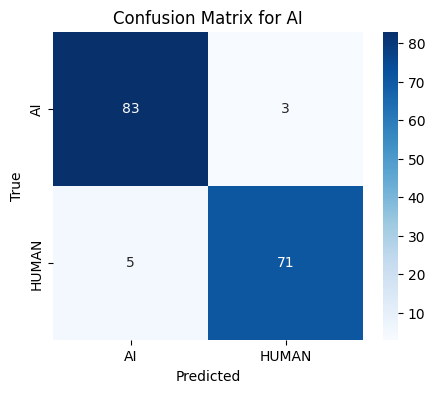

Cross-Validation Accuracy Scores: [0.98148148 0.97530864 0.96296296 0.94409938 0.95031056]
Mean Accuracy: 0.9628326048615904
Standard Deviation: 0.014221001951258394
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
# Tamil
# Train Data
# Load the data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_training_data_hum_ai.csv')
data_tam.info()

# Preprocess the data
data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, 'Tamil'))

# Tokenize the inputs
sentences_tam = data_tam['preprocessed_data'].tolist()

# Sentence Embeddings
embeddings_tam = model.encode(sentences_tam)
# add embeddings to the dataframe
embeddings_tam_df = pd.DataFrame(embeddings_tam, columns=[f'embedding_{i}' for i in range(embeddings_tam.shape[1])])
tam_training_data_hum_ai_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)
tam_training_data_hum_ai_embeddings.to_csv('sentence/tam_training_data_hum_ai_sentence_embeddings.csv', index=False)
embedded_data = pd.read_csv('sentence/tam_training_data_hum_ai_sentence_embeddings.csv')

embedded_data.drop(['DATA','ID','preprocessed_data'], axis=1, inplace=True)
XG(embedded_data)
cross_validate_model(embedded_data)

# Test Data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_test_data_hum_ai.csv')
data_tam.drop('Unnamed: 2',axis=1, inplace=True)
data_tam.info()
data_tam = data_tam.dropna()
data_tam.info()

# Preprocess the data
data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, 'Tamil'))

# Tokenize the inputs
sentences_tam = data_tam['preprocessed_data'].tolist()

# Sentence Embeddings
embeddings_tam = model.encode(sentences_tam)
# add embeddings to the dataframe
embeddings_tam_df = pd.DataFrame(embeddings_tam, columns=[f'embedding_{i}' for i in range(embeddings_tam.shape[1])])
tam_training_data_hum_ai_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)
tam_training_data_hum_ai_embeddings.to_csv('sentence/tam_test_data_hum_ai_sentence_embeddings.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    object
 1   DATA    800 non-null    object
 2   LABEL   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

Accuracy: 0.95625
Classification Report:
              precision  recall  f1-score  support
AI                 0.93    0.99      0.96    80.00
HUMAN              0.99    0.92      0.95    80.00
accuracy           0.96    0.96      0.96     0.96
macro avg          0.96    0.96      0.96   160.00
weighted avg       0.96    0.96      0.96   160.00


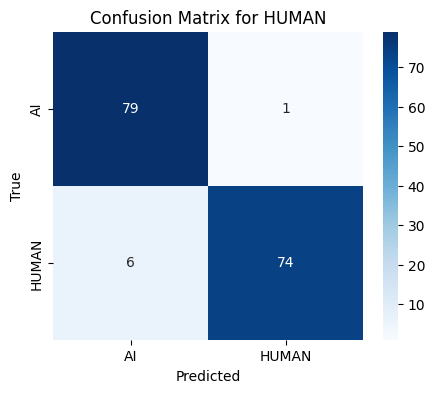

Cross-Validation Accuracy Scores: [0.9375  0.95    0.90625 0.9375  0.94375]
Mean Accuracy: 0.9349999999999999
Standard Deviation: 0.015103807466993205


Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
# Malayalam
# Train Data
# Load the data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_training_data_hum_ai.csv')
data_mal.info()

# Preprocess the data
data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, 'Malayalam'))

# Tokenize the inputs
sentences_mal = data_mal['preprocessed_data'].tolist()

# Sentence Embeddings
embeddings_mal = model.encode(sentences_mal)

# add embeddings to the dataframe
embeddings_mal_df = pd.DataFrame(embeddings_mal, columns=[f'embedding_{i}' for i in range(embeddings_mal.shape[1])])
mal_training_data_hum_ai_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)
mal_training_data_hum_ai_embeddings.to_csv('sentence/mal_training_data_hum_ai_sentence_embeddings.csv', index=False)
embedded_data = pd.read_csv('/kaggle/working/sentence/mal_training_data_hum_ai_sentence_embeddings.csv')
embedded_data.drop(['DATA','ID','preprocessed_data'], axis=1, inplace=True)
XG(embedded_data)
cross_validate_model(embedded_data)

# Test Data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_test_data_hum_ai.csv')
data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, 'Malayalam'))

# Tokenize the inputs
sentences_mal = data_mal['preprocessed_data'].tolist()

# Sentence Embeddings
embeddings_mal = model.encode(sentences_mal)
# add embeddings to the dataframe
embeddings_mal_df = pd.DataFrame(embeddings_mal, columns=[f'embedding_{i}' for i in range(embeddings_mal.shape[1])])
mal_training_data_hum_ai_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)
mal_training_data_hum_ai_embeddings.to_csv('/kaggle/working/sentence/mal_test_data_hum_ai_sentence_embeddings.csv', index=False)

## XLM_roberta

In [7]:
from transformers import AutoTokenizer, AutoModel

# Create 'XLM' directory if it doesn't exist
os.makedirs('XLM', exist_ok=True)

model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      808 non-null    object
 1   DATA    808 non-null    object
 2   LABEL   808 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB
(808, 768)
Accuracy: 0.9876543209876543
Classification Report:
              precision  recall  f1-score  support
AI                 0.99    0.99      0.99    86.00
HUMAN              0.99    0.99      0.99    76.00
accuracy           0.99    0.99      0.99     0.99
macro avg          0.99    0.99      0.99   162.00
weighted avg       0.99    0.99      0.99   162.00


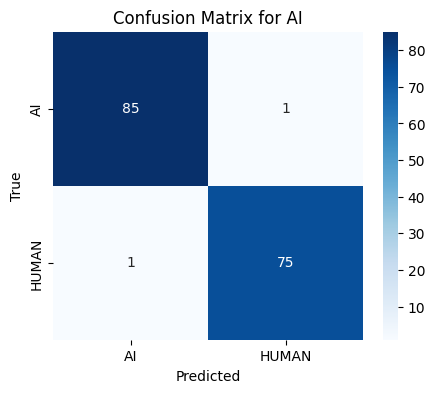

Cross-Validation Accuracy Scores: [0.92592593 0.95061728 0.94444444 0.9689441  0.95031056]
Mean Accuracy: 0.9480484625412162
Standard Deviation: 0.013789409961551475
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 12.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [8]:
# Tamil
# Train data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_training_data_hum_ai.csv')
data_tam.info()

data_tam['preprocessed_data'] = data_tam.apply(lambda x: preprocess_text(x['DATA'], "Tamil"), axis=1)

sentences_tam = data_tam['preprocessed_data'].tolist()

# Tokenize the data
encoded_inputs = tokenizer(
    sentences_tam, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

# Get embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)
    
# Extract embeddings
# `outputs.last_hidden_state` contains embeddings for all tokens
# We can pool embeddings (e.g., by taking the mean of all tokens)
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling

# Convert to numpy if needed
embeddings_numpy = embeddings.cpu().numpy()

print(embeddings_numpy.shape)

# add embeddings to the dataframe
embeddings_tam_df = pd.DataFrame(embeddings_numpy, columns=[f'embedding_{i}' for i in range(embeddings_numpy.shape[1])])
tam_training_data_hum_ai_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)

# Save the dataframes to 'XLM' folder
tam_training_data_hum_ai_embeddings.to_csv('XLM/tam_training_data_hum_ai_roberta_embeddings.csv', index=False)
tam_training_data_hum_ai_embeddings = pd.read_csv('/kaggle/working/XLM/tam_training_data_hum_ai_roberta_embeddings.csv')
tam_training_data_hum_ai_embeddings.drop(['DATA','ID','preprocessed_data'], axis=1, inplace=True)
tam_training_data_hum_ai_embeddings.sample()

XG(tam_training_data_hum_ai_embeddings)
cross_validate_model(tam_training_data_hum_ai_embeddings)

# Test Data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_test_data_hum_ai.csv')
data_tam.drop('Unnamed: 2',axis=1, inplace=True)
data_tam.info()
data_tam = data_tam.dropna()
data_tam.info()

# Preprocess the data
data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, 'Tamil'))

# Tokenize the inputs
sentences_tam = data_tam['preprocessed_data'].tolist()

# Get embeddings
encoded_inputs = tokenizer(
    sentences_tam, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

# Get embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)

# Extract embeddings
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling

# Convert to numpy if needed
embeddings_numpy = embeddings.cpu().numpy()

# add embeddings to the dataframe
embeddings_tam_df = pd.DataFrame(embeddings_numpy, columns=[f'embedding_{i}' for i in range(embeddings_numpy.shape[1])])
tam_test_data_hum_ai_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)
tam_test_data_hum_ai_embeddings.to_csv('/kaggle/working/XLM/tam_test_data_hum_ai_roberta_embeddings.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    object
 1   DATA    800 non-null    object
 2   LABEL   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB
(800, 768)
Accuracy: 0.89375
Classification Report:
              precision  recall  f1-score  support
AI                 0.85    0.95      0.90    80.00
HUMAN              0.94    0.84      0.89    80.00
accuracy           0.89    0.89      0.89     0.89
macro avg          0.90    0.89      0.89   160.00
weighted avg       0.90    0.89      0.89   160.00


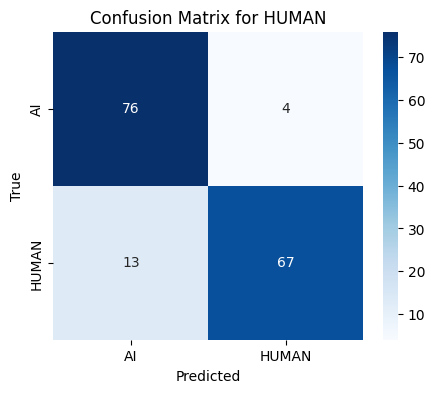

Cross-Validation Accuracy Scores: [0.925   0.91875 0.90625 0.90625 0.89375]
Mean Accuracy: 0.9099999999999999
Standard Deviation: 0.010897247358851676
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    object
 1   DATA    200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      200 non-null    object
 1   DATA    200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [9]:
# Malayalam
# Train data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_training_data_hum_ai.csv')
data_mal.info()

data_mal['preprocessed_data'] = data_mal.apply(lambda x: preprocess_text(x['DATA'], "Malayalam"), axis=1)

sentences_mal = data_mal['preprocessed_data'].tolist()

# Tokenize the data
encoded_inputs = tokenizer(
    sentences_mal, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

# Get embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)
    
# Extract embeddings
# `outputs.last_hidden_state` contains embeddings for all tokens
# We can pool embeddings (e.g., by taking the mean of all tokens)
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling

# Convert to numpy if needed
embeddings_mal = embeddings.cpu().numpy()

print(embeddings_mal.shape)

# add embeddings to the dataframe
embeddings_mal_df = pd.DataFrame(embeddings_mal, columns=[f'embedding_{i}' for i in range(embeddings_mal.shape[1])])
mal_training_data_hum_ai_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)

# Save the dataframes to 'XLM' folder
mal_training_data_hum_ai_embeddings.to_csv('XLM/mal_training_data_hum_ai_roberta_embeddings.csv', index=False)
mal_training_data_hum_ai_embeddings = pd.read_csv('/kaggle/working/XLM/mal_training_data_hum_ai_roberta_embeddings.csv')
mal_training_data_hum_ai_embeddings.drop(['DATA','ID','preprocessed_data'], axis=1, inplace=True)
mal_training_data_hum_ai_embeddings.sample()

XG(mal_training_data_hum_ai_embeddings)
cross_validate_model(mal_training_data_hum_ai_embeddings)

# Test Data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_test_data_hum_ai.csv')
data_mal.info()
data_mal = data_mal.dropna()
data_mal.info()

# Preprocess the data
data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, 'Malayalam'))

# Tokenize the inputs
sentences_mal = data_mal['preprocessed_data'].tolist()

# Get embeddings
encoded_inputs = tokenizer(
    sentences_mal, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

# Get embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)

# Extract embeddings
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean

# Convert to numpy if needed
embeddings_numpy = embeddings.cpu().numpy()

# add embeddings to the dataframe
embeddings_mal_df = pd.DataFrame(embeddings_numpy, columns=[f'embedding_{i}' for i in range(embeddings_numpy.shape[1])])
mal_test_data_hum_ai_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)
mal_test_data_hum_ai_embeddings.to_csv('/kaggle/working/XLM/mal_test_data_hum_ai_roberta_embeddings.csv', index=False)

## Indic

In [10]:
model_name = "ai4bharat/IndicBERTv2-MLM-only"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Create 'indic' directory if it doesn't exist
os.makedirs('indic', exist_ok=True)

tokenizer_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/639 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      808 non-null    object
 1   DATA    808 non-null    object
 2   LABEL   808 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB
(808, 768)
Accuracy: 0.9691358024691358
Classification Report:
              precision  recall  f1-score  support
AI                 0.97    0.98      0.97    86.00
HUMAN              0.97    0.96      0.97    76.00
accuracy           0.97    0.97      0.97     0.97
macro avg          0.97    0.97      0.97   162.00
weighted avg       0.97    0.97      0.97   162.00


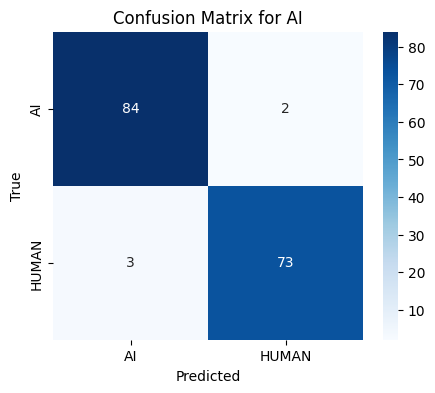

Cross-Validation Accuracy Scores: [0.95679012 0.97530864 0.95679012 0.95652174 0.98136646]
Mean Accuracy: 0.9653554175293306
Standard Deviation: 0.010772024369534335


In [11]:
# Load the data
# Tamil
# Training data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_training_data_hum_ai.csv')
data_tam.info()

# Preprocess the data
data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, "Tamil"))

# Tokenize the inputs
sentences_tam = data_tam['preprocessed_data'].tolist()

# Tokenize the inputs
encoded_inputs = tokenizer(
    sentences_tam, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

# Get embeddings
with torch.no_grad():
    outputs = model(**encoded_inputs)
    
# Extract embeddings
# `outputs.last_hidden_state` contains embeddings for all tokens
# We can pool embeddings (e.g., by taking the mean of all tokens)
embeddings = outputs.last_hidden_state.mean(dim=1)  # Mean pooling

# Convert to numpy if needed
embeddings_numpy = embeddings.cpu().numpy()

print(embeddings_numpy.shape)

embeddings_tam_df = pd.DataFrame(embeddings_numpy, columns=[f'embedding_{i}' for i in range(embeddings_numpy.shape[1])])
data_tam = pd.concat([data_tam, embeddings_tam_df], axis=1)
data_tam.to_csv('indic/tam_training_data_hum_ai_indicbert_embeddings.csv', index=False)

embedded_data_tam = pd.read_csv('/kaggle/working/indic/tam_training_data_hum_ai_indicbert_embeddings.csv')
embedded_data_tam.drop(['DATA','ID','preprocessed_data'], axis=1, inplace=True)

XG(embedded_data_tam)
cross_validate_model(embedded_data_tam)

In [12]:
# Test Data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_test_data_hum_ai.csv')
data_tam.drop('Unnamed: 2',axis=1, inplace=True)
data_tam = data_tam.dropna()
data_tam.info()

data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, "Tamil"))

sentences_tam = data_tam['preprocessed_data'].tolist()

encoded_inputs = tokenizer(
    sentences_tam, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model(**encoded_inputs)
    embeddings = outputs.last_hidden_state

pooled_embeddings = embeddings.mean(dim=1)

embeddings_tam_df = pd.DataFrame(pooled_embeddings.cpu().numpy(), columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])
tam_test_data_hum_ai_indicbert_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)
tam_test_data_hum_ai_indicbert_embeddings.to_csv('indic/tam_test_data_hum_ai_indicbert_embeddings.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    object
 1   DATA    800 non-null    object
 2   LABEL   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB
Accuracy: 0.9375
Classification Report:
              precision  recall  f1-score  support
AI                 0.96    0.91      0.94    80.00
HUMAN              0.92    0.96      0.94    80.00
accuracy           0.94    0.94      0.94     0.94
macro avg          0.94    0.94      0.94   160.00
weighted avg       0.94    0.94      0.94   160.00


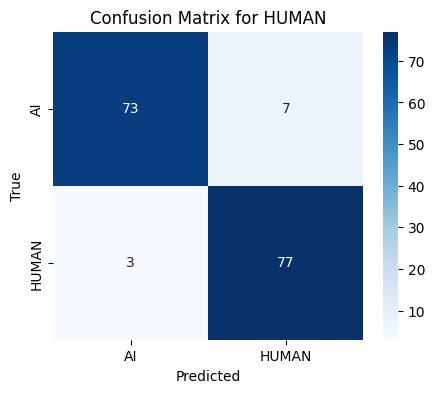

Cross-Validation Accuracy Scores: [0.9375  0.94375 0.91875 0.925   0.9125 ]
Mean Accuracy: 0.9274999999999999
Standard Deviation: 0.011592023119369634


In [13]:
# Malayalam
# Train Data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_training_data_hum_ai.csv')
data_mal.info()

data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, "Malayalam"))

sentences_mal = data_mal['preprocessed_data'].tolist()

encoded_inputs = tokenizer(
    sentences_mal, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model(**encoded_inputs)
    embeddings = outputs.last_hidden_state

pooled_embeddings = embeddings.mean(dim=1)

embeddings_mal_df = pd.DataFrame(pooled_embeddings.cpu().numpy(), columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])

mal_training_data_hum_ai_indicbert_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)

# Save the dataframes
mal_training_data_hum_ai_indicbert_embeddings.to_csv('indic/mal_training_data_hum_ai_indicbert_embeddings.csv', index=False)

# Load the dataframes
embedded_data_mal = pd.read_csv('/kaggle/working/indic/mal_training_data_hum_ai_indicbert_embeddings.csv')

embedded_data_mal.drop(['DATA', 'preprocessed_data','ID'], axis=1, inplace=True)

XG(embedded_data_mal)
cross_validate_model(embedded_data_mal)

# Test Data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_test_data_hum_ai.csv')

data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, "Malayalam"))

sentences_mal = data_mal['preprocessed_data'].tolist()

encoded_inputs = tokenizer(
    sentences_mal, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model(**encoded_inputs)
    embeddings = outputs.last_hidden_state

pooled_embeddings = embeddings.mean(dim=1)

embeddings_mal_df = pd.DataFrame(pooled_embeddings.cpu().numpy(), columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])

mal_test_data_hum_ai_indicbert_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)
mal_test_data_hum_ai_indicbert_embeddings.to_csv('/kaggle/working/indic/mal_test_data_hum_ai_indicbert_embeddings.csv', index=False)

## MT5

In [14]:
from transformers import MT5Tokenizer, MT5Model

# Create 'MT5' directory if it doesn't exist
os.makedirs('MT5', exist_ok=True)

# Load MT5 model and tokenizer
tokenizer = MT5Tokenizer.from_pretrained("google/mT5-small")
model = MT5Model.from_pretrained("google/mT5-small")

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      808 non-null    object
 1   DATA    808 non-null    object
 2   LABEL   808 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB
Accuracy: 0.9197530864197531
Classification Report:
              precision  recall  f1-score  support
AI                 0.93    0.92      0.92    86.00
HUMAN              0.91    0.92      0.92    76.00
accuracy           0.92    0.92      0.92     0.92
macro avg          0.92    0.92      0.92   162.00
weighted avg       0.92    0.92      0.92   162.00


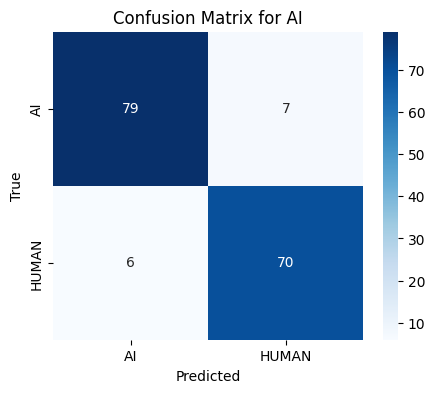

Cross-Validation Accuracy Scores: [0.94444444 0.95679012 0.91975309 0.95031056 0.95652174]
Mean Accuracy: 0.9455639904915267
Standard Deviation: 0.013682721816990215


In [15]:
# Tamil
# Training data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_training_data_hum_ai.csv')
data_tam.info()

# Apply preprocessing to each sentence and add a new column
data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, "Tamil"))

sentences_tam = data_tam['preprocessed_data'].tolist()

# Tokenize the inputs
encoded_inputs = tokenizer(
    sentences_tam, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

# Get embeddings
with torch.no_grad():
    outputs = model.encoder(**encoded_inputs)
    embeddings = outputs.last_hidden_state  # Shape: (batch_size, seq_len, hidden_dim)

# Optional: Pool embeddings (e.g., take the mean across tokens)
pooled_embeddings = embeddings.mean(dim=1)  # Shape: (batch_size, hidden_dim)

# add embeddings to the dataframe
embeddings_tam_df = pd.DataFrame(pooled_embeddings, columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])
tam_training_data_hum_ai_mt5_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)
tam_training_data_hum_ai_mt5_embeddings.to_csv('MT5/tam_training_data_hum_ai_mt5_embeddings.csv', index=False)
embedded_data_tam = pd.read_csv('MT5/tam_training_data_hum_ai_mt5_embeddings.csv')
embedded_data_tam.drop(['DATA', 'preprocessed_data', 'ID'], axis=1, inplace=True)

XG(embedded_data_tam)
cross_validate_model(embedded_data_tam)

In [16]:
# Test Data
data_tam = pd.read_csv('/kaggle/input/naacl-human-ai/tam_test_data_hum_ai.csv')
data_tam.drop('Unnamed: 2', axis=1, inplace=True)
data_tam = data_tam.dropna()
data_tam.info()

data_tam['preprocessed_data'] = data_tam['DATA'].apply(lambda x: preprocess_text(x, "Tamil"))

sentences_tam = data_tam['preprocessed_data'].tolist()

encoded_inputs = tokenizer(
    sentences_tam,
    padding=True,
    truncation=True,
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model.encoder(**encoded_inputs)
    embeddings = outputs.last_hidden_state

pooled_embeddings = embeddings.mean(dim=1)

embeddings_tam_df = pd.DataFrame(pooled_embeddings, columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])

tam_test_data_hum_ai_mt5_embeddings = pd.concat([data_tam, embeddings_tam_df], axis=1)

tam_test_data_hum_ai_mt5_embeddings.to_csv('MT5/tam_test_data_hum_ai_mt5_embeddings.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      100 non-null    object
 1   DATA    100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    object
 1   DATA    800 non-null    object
 2   LABEL   800 non-null    object
dtypes: object(3)
memory usage: 18.9+ KB
Accuracy: 0.93125
Classification Report:
              precision  recall  f1-score  support
AI                 0.91    0.96      0.93    80.00
HUMAN              0.96    0.90      0.93    80.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.93    0.93      0.93   160.00
weighted avg       0.93    0.93      0.93   160.00


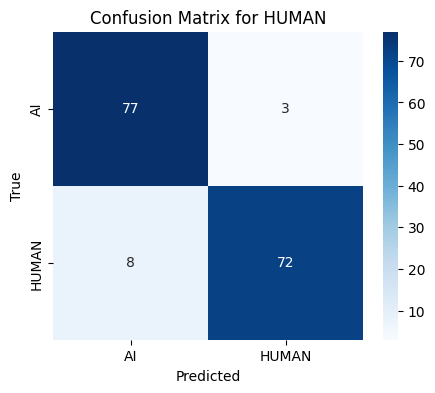

Cross-Validation Accuracy Scores: [0.95    0.925   0.93125 0.925   0.91875]
Mean Accuracy: 0.93
Standard Deviation: 0.01075290658380327


In [17]:
# Malayalam
# Training data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_training_data_hum_ai.csv')
data_mal.info()


data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, "Malayalam"))

sentences_mal = data_mal['preprocessed_data'].tolist()

encoded_inputs = tokenizer(
    sentences_mal, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model.encoder(**encoded_inputs)
    embeddings = outputs.last_hidden_state

pooled_embeddings = embeddings.mean(dim=1)

embeddings_mal_df = pd.DataFrame(pooled_embeddings, columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])
mal_training_data_hum_ai_mt5_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)

# Save the dataframes to 'MT5' folder
mal_training_data_hum_ai_mt5_embeddings.to_csv('MT5/mal_training_data_hum_ai_mt5_embeddings.csv', index=False)

# Load the dataframes from 'MT5' folder
embedded_data_mal = pd.read_csv('/kaggle/working/MT5/mal_training_data_hum_ai_mt5_embeddings.csv')

embedded_data_mal.drop(['DATA', 'preprocessed_data', 'ID'], axis=1, inplace=True)

XG(embedded_data_mal)
cross_validate_model(embedded_data_mal)

In [18]:
# Test Data
data_mal = pd.read_csv('/kaggle/input/naacl-human-ai/mal_test_data_hum_ai.csv')

data_mal['preprocessed_data'] = data_mal['DATA'].apply(lambda x: preprocess_text(x, "Malayalam"))

sentences_mal = data_mal['preprocessed_data'].tolist()

encoded_inputs = tokenizer(
    sentences_mal, 
    padding=True, 
    truncation=True, 
    return_tensors="pt"
)

with torch.no_grad():
    outputs = model.encoder(**encoded_inputs)
    embeddings = outputs.last_hidden_state

pooled_embeddings = embeddings.mean(dim=1)

embeddings_mal_df = pd.DataFrame(pooled_embeddings, columns=[f'embedding_{i}' for i in range(pooled_embeddings.shape[1])])

mal_test_data_hum_ai_mt5_embeddings = pd.concat([data_mal, embeddings_mal_df], axis=1)
mal_test_data_hum_ai_mt5_embeddings.to_csv('MT5/mal_test_data_hum_ai_mt5_embeddings.csv', index=False)